# 04. Data Processing

### Importando as bibliotecas

In [1]:
import sys
import warnings
sys.path.append('..')
import pandas as pd
from ydata_profiling import ProfileReport
import functions.fn_stats as fn_stats
import functions.fn_charts as fn_charts
import params.consts as consts

### Ignorando os warnings irrelevantes

Ignorando os warnings indevidos que apareceram devido a cópia de dataframes para fazer ajustes nos dados. 

Obs: na primeira vez que fiz o projeto não houve esses avisos não, mas agora melhorando alguns pontos apareceu do nada. Tentei retirar mas continua dando esses avisos.

In [2]:
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning) # Ignorando os warnings do tipo SettingWithCopyWarning

### Armazenando o dataset em uma variável

In [3]:
df = pd.read_csv(consts.DATASET_RAW) # Armazenando o dataset em uma variável

### Excluindo as colunas que contém valores únicos

In [4]:
df = df.drop([
    'ID',
    ], 
    axis=1 # Definindo que as colunas serão excluídas
) # Excluindo as colunas

### Excluindo as colunas que contém valores constantes

In [5]:
df = df.drop([
    'Z_CostContact', 
    'Z_Revenue',
    ], 
    axis=1 # Definindo que as colunas serão excluídas
) # Excluindo as colunas

### Excluindo as colunas que contém valores vazios
- N/A

### Excluindo as colunas que contém muitos valores vazios
- N/A

### Excluindo as colunas que contém informações redundantes
- N/A

### Excluindo as colunas que contém informações irrelevantes
- N/A

### Excluindo as colunas que contém textos livres
- N/A

### Lendo o dataset tratado e visualizando o overview atual

In [6]:
pd.set_option('display.max_columns', None) # Alterando as configurações do Pandas para exibir mais de 20 colunas

df # Exibindo o dataset

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [7]:
df.shape # Visualizando a quantidade de linhas e colunas do dataset

(2240, 26)

In [8]:
df.info() # Exibindo as informações das variáveis do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [9]:
fn_stats.describe(df) # Usando a função que exibe as estatísticas das colunas numéricas

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.00,2216.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,1968.81,52247.25,0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,0.07,0.07,0.07,0.06,0.01,0.01,0.15
std,11.98,25173.08,0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.36
min,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1959.00,35303.00,0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1970.00,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1977.00,68522.00,1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [10]:
df.describe(exclude='number') # Exibindo as estatísticas das colunas categóricas

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,2012-08-31
freq,1127,864,12


In [11]:
df.isnull().sum() # Somando todos os valores nulos de cada coluna

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

### Tratando as colunas com valores nulos/vazios

In [12]:
df = df.drop([
    
    ], 
    axis=1 # Definindo que as colunas serão excluídas
) # Excluindo as colunas com grande parte dos valores vazios, pois não há valores confiáveis para preencher os dados vazios e não são extremamente relevantes para o modelo

In [13]:
df = df.dropna(subset=[
    'Income'
]) # Removendo as linhas com valores nulos da coluna pois são poucos registros em relação à todo o dataset

### Corrigindo os tipos de dados das colunas

In [14]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%Y-%m-%d') # Convertendo a coluna para o formato de data

### Criando colunas de tempo/idade

In [15]:
df['Days_Since_Enrolled'] = df['Dt_Customer'].max() - df['Dt_Customer'] # Criando a coluna com a diferença do valor máximo das datas e a data de cadastro do cliente
df['Days_Since_Enrolled'] = df['Days_Since_Enrolled'].dt.days # Convertendo o tempo para dias
df['Years_Since_Enrolled'] = df['Days_Since_Enrolled'] // 365 # Criando a coluna apenas com anos inteiros (dividindo com 2 barras)
df['Age'] = df['Dt_Customer'].max().year - df['Year_Birth'] # Criando a coluna com a idade dos clientes, fixando o valor máximmo das datas da campanha para que as idades não fiquem variando de acordo com o tempo que o código é rodado

### Mesclando colunas com muitas categorias

In [16]:
df['AgeGroup'] = pd.cut( # Criando essa coluna para agrupar as idades em intervalos padrões de cerca de 15 anos
    df['Age'], # Definindo a coluna que será usada para criar os intervalos
    bins=[18, 30, 45, 60, df['Age'].max()], # Definindo os intervalos
    labels=['18-30', '31-45', '46-60', '61+'], # Definindo os rótulos de como os dados vão aparecer no dataset
    include_lowest=True # Incluindo o valor inicial no intervalo
)
df['Marital_Status'] = df['Marital_Status'].replace( # Agrupando melhor os dados dessa coluna
    {
        'Alone': 'Single',
        'Absurd': 'Single',
        'YOLO': 'Single',
        'Together': 'Partner',
        'Married': 'Partner',
        'Widow': 'Single',
        'Single': 'Single',
        'Divorced': 'Single',
    }
)

In [17]:
display(df['AgeGroup'].value_counts(normalize=True).map('{:.1%}'.format).sort_index()) # Verificando o resultado da transformação na coluna em %
display(df['Marital_Status'].value_counts(normalize=True).map('{:.1%}'.format).sort_index()) # Verificando o resultado da transformação na coluna em %

AgeGroup
18-30    11.6%
31-45    43.5%
46-60    32.8%
61+      12.0%
Name: proportion, dtype: object

Marital_Status
Partner    64.5%
Single     35.5%
Name: proportion, dtype: object

### Unificando colunas semelhantes

In [18]:
df['Children'] = df['Kidhome'] + df['Teenhome'] # Criando a coluna com o total de dependentes do cliente
df['MntTotal'] = ( # Criando a coluna com o total gasto em todas as categorias de produtos
    df['MntWines'] + 
    df['MntFruits'] + 
    df['MntMeatProducts'] + 
    df['MntFishProducts'] + 
    df['MntSweetProducts'] + 
    df['MntGoldProds']
)
df['AcceptedCmpTotal'] = ( # Criando a coluna com o total de campanhas aceitas pelo cliente
    df['AcceptedCmp1'] + 
    df['AcceptedCmp2'] + 
    df['AcceptedCmp3'] + 
    df['AcceptedCmp4'] + 
    df['AcceptedCmp5'] 
)
df['NumTotalPurchases'] = ( # Criando a coluna com o total de compras feitas pelo cliente
    df['NumWebPurchases'] + 
    df['NumCatalogPurchases'] + 
    df['NumStorePurchases'] 
)

In [19]:
display(df['Children'].value_counts(normalize=True).map('{:.1%}'.format).sort_index()) # Verificando o resultado da transformação na coluna em %
display(df['AcceptedCmpTotal'].value_counts(normalize=True).map('{:.1%}'.format).sort_index()) # Verificando o resultado da transformação na coluna em %

Children
0    28.6%
1    50.4%
2    18.8%
3     2.3%
Name: proportion, dtype: object

AcceptedCmpTotal
0    79.3%
1    14.6%
2     3.7%
3     2.0%
4     0.5%
Name: proportion, dtype: object

### Criando colunas derivadas de outras

In [20]:
df['HasChildren'] = df['Children'].apply(lambda x: 1 if x > 0 else 0) # Criando a coluna que verifica se o cliente tem dependentes através de uma função anônima (na própria linha de código)
df['MntRegularProds'] = df['MntTotal'] - df['MntGoldProds'] # Criando a coluna com o valor gasto somente em produtos regulares
df['HasAcceptedCmp'] = df['AcceptedCmpTotal'].apply(lambda x: 1 if x > 0 else 0) # Criando a coluna que verifica se o cliente já aceitou uma campanha através de uma função anônima (na própria linha de código)

### Visualizando o dataset antes de tratar outliers e excluir colunas

In [21]:
df.head(3) # Exibindo as 3 primeiras linhas do dataset

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Since_Enrolled,Years_Since_Enrolled,Age,AgeGroup,Children,MntTotal,AcceptedCmpTotal,NumTotalPurchases,HasChildren,MntRegularProds,HasAcceptedCmp
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663,1,57,46-60,0,1617,0,22,0,1529,0
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113,0,60,46-60,2,27,0,4,1,21,0
2,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312,0,49,46-60,0,776,0,20,0,734,0


### Tratando as colunas com valores outliers

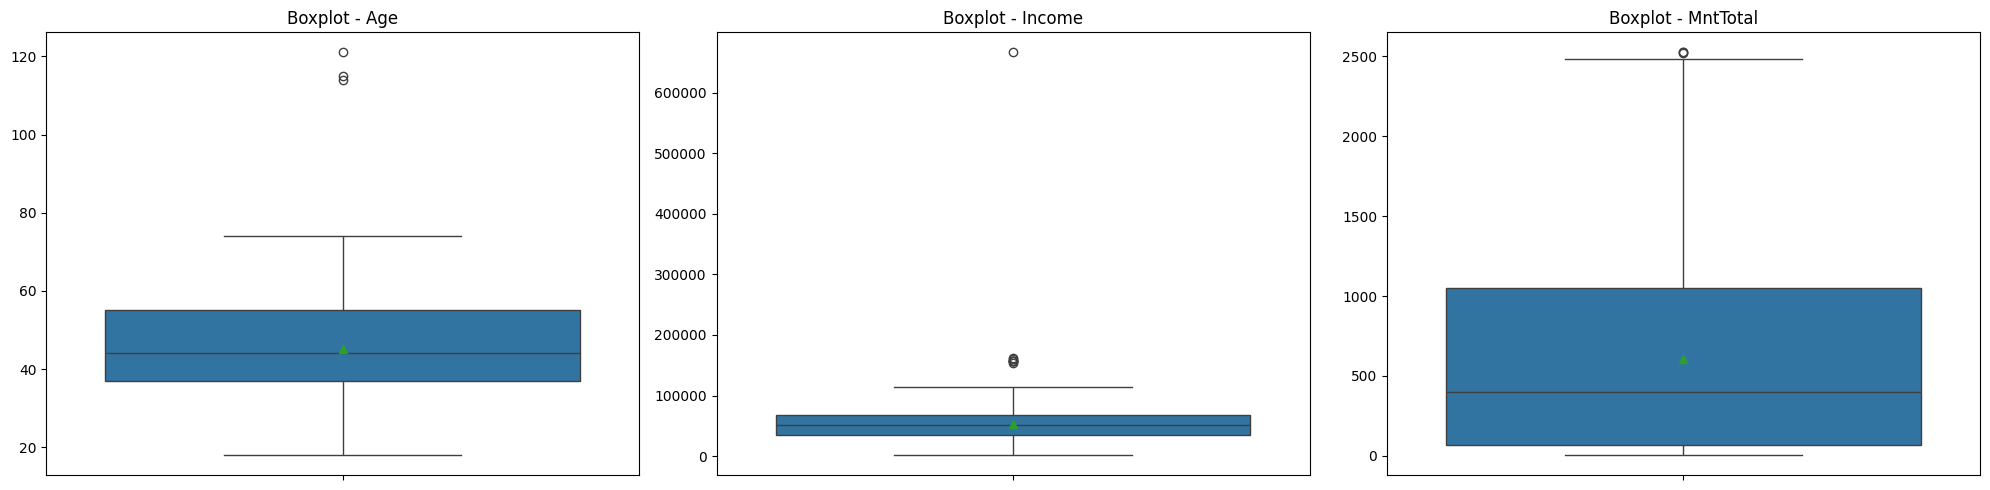

In [22]:
fn_charts.boxplots(df,  ['Age', 'Income', 'MntTotal']) # Exibindo os gráficos de boxplots antes do tratamento

In [23]:
fn_stats.inspect_outliers(df, 'Age') # Usando a função para listar os outliers

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Since_Enrolled,Years_Since_Enrolled,Age,AgeGroup,Children,MntTotal,AcceptedCmpTotal,NumTotalPurchases,HasChildren,MntRegularProds,HasAcceptedCmp
192,1900,2n Cycle,Single,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0,276,0,114,61+,1,65,0,5,1,40,0
239,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,43,0,121,61+,1,22,0,3,1,20,0
339,1899,PhD,Partner,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,276,0,115,61+,0,1853,1,14,0,1629,1


In [24]:
fn_stats.inspect_outliers(df, 'Income') # Usando a função para listar os outliers

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Since_Enrolled,Years_Since_Enrolled,Age,AgeGroup,Children,MntTotal,AcceptedCmpTotal,NumTotalPurchases,HasChildren,MntRegularProds,HasAcceptedCmp
164,1973,PhD,Partner,157243.0,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0,120,0,41,31-45,1,1608,0,22,1,1607,0
617,1976,PhD,Partner,162397.0,1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0,391,1,38,31-45,2,107,0,1,1,105,0
655,1975,Graduation,Single,153924.0,0,0,2014-02-07,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,142,0,39,31-45,0,6,0,0,0,5,0
687,1982,PhD,Partner,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,694,1,32,31-45,0,1717,0,29,0,1713,0
1300,1971,Master,Partner,157733.0,1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0,390,1,43,31-45,1,59,0,2,1,51,0
1653,1977,Graduation,Partner,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,426,1,37,31-45,0,1730,0,28,0,1729,0
2132,1949,PhD,Partner,156924.0,0,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,304,0,65,61+,0,8,0,0,0,7,0
2233,1977,Graduation,Partner,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,392,1,37,31-45,1,62,0,7,1,50,0


In [25]:
df = df.drop(fn_stats.inspect_outliers(df,'Age').index) # Removendo os outliers 
df = df.drop(fn_stats.inspect_outliers(df,'Income').index) # Removendo os outliers 

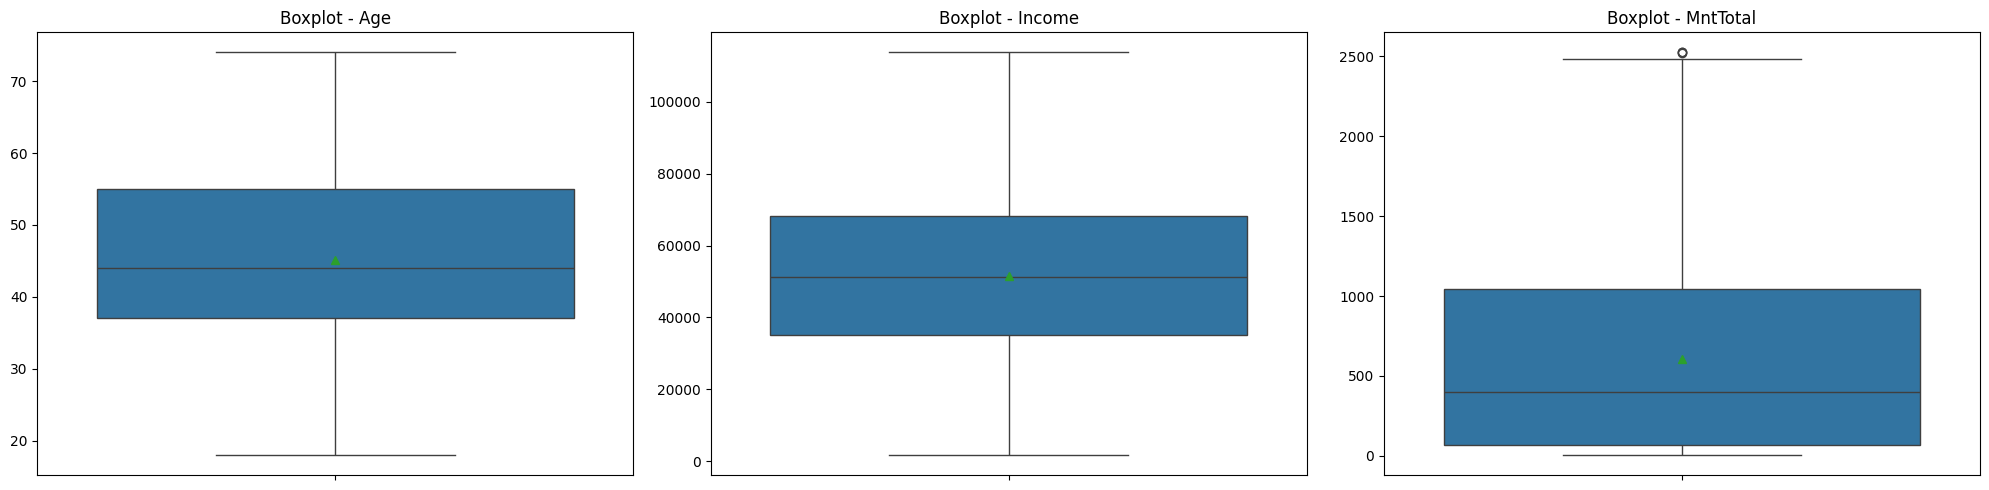

In [26]:
fn_charts.boxplots(df,  ['Age', 'Income', 'MntTotal']) # Exibindo os gráficos de boxplots antes do tratamento

### Salvando o dataset processado

In [27]:
df.to_csv(consts.DATASET_PROCESSED, index=False) # Salvando o dataset processado

### Excluindo as colunas auxiliares

In [28]:
df = df.drop( # Excluindo as colunas auxiliares
    [ 
        'Dt_Customer', 
        'Year_Birth', 
        'Kidhome',
        'Teenhome',
        'MntWines', 
        'MntFruits', 
        'MntMeatProducts', 
        'MntFishProducts', 
        'MntSweetProducts',
        'AcceptedCmp1',
        'AcceptedCmp2',
        'AcceptedCmp3',
        'AcceptedCmp4',
        'AcceptedCmp5', 
        'NumWebPurchases', 
        'NumCatalogPurchases', 
        'NumStorePurchases', 
    ], 
    axis=1 # Definindo que colunas serão excluídas
) 

### Ordenando as colunas relacionadas

In [29]:
df = df.reindex(columns=[ # Ordenando as colunas em uma ordem que faz mais sentido para análises
        'Education', 
        'Marital_Status', 
        'Children',
        'HasChildren',
        'Age',
        'AgeGroup',
        'Income',
        'Recency',
        'Complain',
        'Days_Since_Enrolled',
        'Years_Since_Enrolled',
        'NumDealsPurchases',
        'NumWebVisitsMonth',
        'NumTotalPurchases',
        'MntRegularProds',
        'MntGoldProds',
        'MntTotal',
        'AcceptedCmpTotal',
        'HasAcceptedCmp',
        'Response',
    ]
)

### Salvando o dataset lean

In [31]:
df.to_csv(consts.DATASET_LEAN, index=False) # Salvando o dataset lean

### Gerando um novo relatório Profile Report

In [ ]:
profile = ProfileReport(df) # Armazenando em uma variável o ProfileReport

profile.to_file(consts.EDA_1) # Salvando o profile report na pasta reports em formato html